## Challenge_Distribution

In this challenge you consider the real estate data from the city of Ames, Iowa. The details of every real estate transaction in Ames is recorded by the City Assessor's office (https://www.openintro.org/stat/data/ames.csv).

**Based on this data, perform the following tasks**:

- Take a random sample of size 50 from <code>price</code>. Using this sample, what is your best point estimate of the population mean?


- Since you have access to the population, simulate the sampling distribution for the average home price in Ames by taking 5000 samples from the population of size 50 and computing 5000 sample means. Store these means in a vector called <code>sample_means50</code>. Plot the data, then describe the shape of this sampling distribution. Based on this sampling distribution, what would you guess the mean home price of the population to be? Finally, calculate and report the population mean.


- Change your sample size from 50 to 150, then compute the sampling distribution using the same method as above, and store these means in a new vector called <code>sample_means150</code>. Describe the shape of this sampling distribution, and compare it to the sampling distribution for a sample size of 50. Based on this sampling distribution, what would you guess to be the mean sale price of homes in Ames?


- Of the sampling distributions from 2 and 3, which has a smaller spread? If we’re concerned with making estimates that are more often close to the true value, would we prefer a distribution with a large or small spread?


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

###  Challenge 1

Take a random sample of size 50 from price. Using this sample, what is your best point estimate of the population mean?

In [4]:
data = pd.read_csv('ames.csv')
data.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
sampled_price = data['SalePrice'].sample(50)
sampled_price.head()

1435    215700
2677     75000
245     270000
2050    115400
1547    120500
Name: SalePrice, dtype: int64

In [8]:
est_mean = statistics.mean(sampled_price)
print(' best point estimate of the population mean : \n', est_mean)

 best point estimate of the population mean : 
 182985.94


### Challenge 2

Since you have access to the population, simulate the sampling distribution for the average home price in Ames by taking 5000 samples from the population of size 50 and computing 5000 sample means. Store these means in a vector called sample_means50. Plot the data, then describe the shape of this sampling distribution. Based on this sampling distribution, what would you guess the mean home price of the population to be? Finally, calculate and report the population mean.

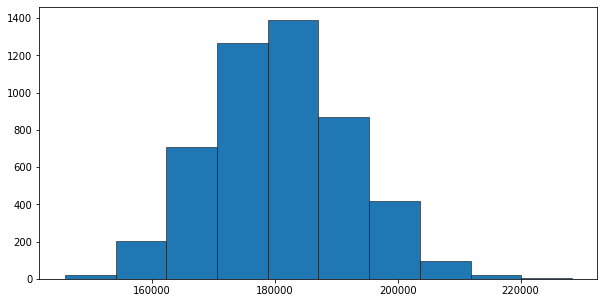

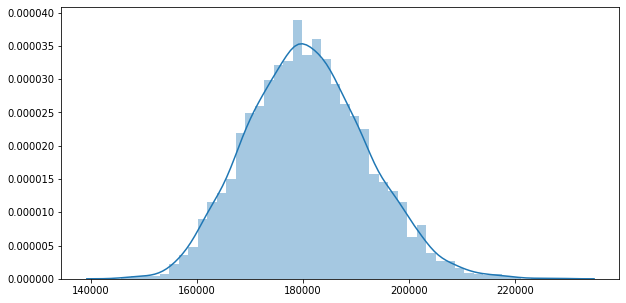

In [18]:
sample_means50 = [data['SalePrice'].sample(50).mean() for i in range(0, 5000)]

plt.hist(sample_means50, edgecolor = 'black', linewidth = 0.5)
plt.show()
#plot to see the curve (better view of the distribution type)
sns.distplot(sample_means50)

This is a near normal distribution with center at around 180000.
Mean home price of the population is at approximately 180000 $

In [20]:
# actual mean
statistics.mean(data['SalePrice'])

180796.0600682594

Actual mean and sampled means do not vary massively. Good!

### Challenge 3

Change your sample size from 50 to 150, then compute the sampling distribution using the same method as above, and store these means in a new vector called sample_means150. Describe the shape of this sampling distribution, and compare it to the sampling distribution for a sample size of 50. Based on this sampling distribution, what would you guess to be the mean sale price of homes in Ames?

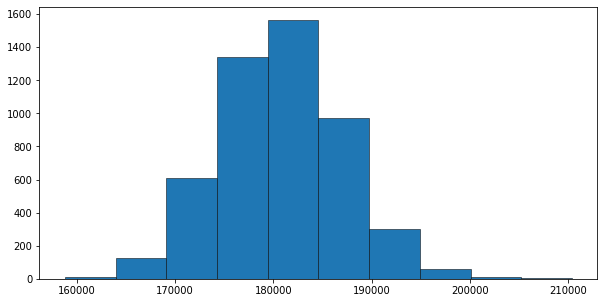

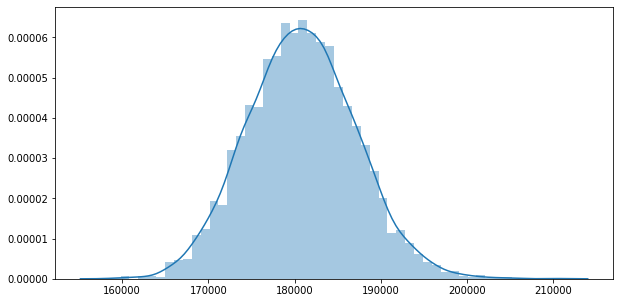

In [21]:
sample_means150 = [data['SalePrice'].sample(150).mean() for i in range(0, 5000)]

plt.hist(sample_means150, edgecolor = 'black', linewidth = 0.5)
plt.show()
#plot to see the curve (better view of the distribution type)
sns.distplot(sample_means150)

The 2 samples have similar shapes both indicating nearly normal distribution. The latter also indicated a mean of around 180000$. 

### Challenge 4

Of the sampling distributions from 2 and 3, which has a smaller spread? If we’re concerned with making estimates that are more often close to the true value, would we prefer a distribution with a large or small spread?

In [24]:
from scipy.stats import skew

skew_50 = skew(sample_means50)
skew_150 = skew(sample_means150)
print('50 skewness: \n', skew_50)
print('150 skewness: \n', skew_150)

50 skewness: 
 0.23499989602985102
150 skewness: 
 0.13315000082039655


sample_means150 has a smaller spread based on the skweness(.1331), a small spread for estimating true values is prefrered, thus the 150 samples.